# Fundamentals of Data Analysis - Project

## Introduction

This Jupyter Notebook contains my research and exploratory data analysis of the well-known Tips dataset using the Python packages, Pandas, NumPy, Scikit-learn, Seaborn and Jupyter. The data set consists of details of 244 tips which were recorded by a waiter which he received over while working in one restaurant. 

![Image of USD banknotes](https://upload.wikimedia.org/wikipedia/commons/thumb/0/00/USDnotesNew.png/800px-USDnotesNew.png) 

The objective of my exploratory data analysis of the dataset is as follows:
* present insights into the dataset.
* uncover the underlying data structure;
* extract important variables;
* detect outliers and anomalies in the data;
* test underlying assumptions;
* develop a linear regression model.

### About the Fundamentals of Data Analysis - Project

There are five distinct tasks carried out in my Jupyter notebook.

1. Data Collection
    * I give a brief description of what is in the dataset, I outline the steps taken to load the dataset and I describe what the variables look like.
2. Data Cleaning
    * I check for missing data and take a closer look at the dataset to check for outliers or other anomalies.
3. Data Preprocessing
    * I outline the steps taken to prepare the data for analysis.
4. Exploratory Data Analysis (EDA)
    * I conducted two methods of EDA; descriptive statistics and data visualization.
        * Descriptive Statistics - I calculate summary statistics such as average tip, the biggest tip, the smallest tip. I discuss whether the average tip is a typical value or not. I investigate any interesting results, by exploring subsets of the data.
        * Data Visualization - I employed several data visualization techniques, ranging from simple 1-dimensional plots such as histograms, 2-dimensional scatter plot up to 3-dimensional scatterplots & bubble charts to analyse univariate and multivariate relationships.
5. Linear Regression
    * I explain what regression is and what it is used for. Then I investigate if there is a relationship between the total bill and tip size using Simple Linear Regression. Finally, I predict what tip would be given for a set spend, i.e. 100$.

## Table of Contents

- [1. Data Collection](#info)
    - [1.1 About This Data Set](#about)
    - [1.2 Libraries](#library)
    - [1.3 Loading Data](#load)
    - [1.4 Review Data Types](#types)
    - [1.5 Data Set Description](#description)
- [2. Data Cleaning](#cleaning)
    - [2.1 Detect Missing Data](#missing)
    - [2.2 First and Last DataFrame Rows](#first)
    - [2.3 Data Cleaning Results](#clean)
- [3. Data Preprocessing](#preprocessing)   
    - [3.1 Rename Columns](#rename)
    - [3.2 Add New Column to The Data Set to Show Tip%](#add)
    - [3.3 Add New Column Showing Day as Numeric Value](#day)
    - [3.4 Outliers](#outliers)
- [4. Exploratory Data Analysis](#eda)
    - [4.1 Descriptive Statistics](#descriptive)
        - [4.1.1 Summary Statistics](#summary)
        - [4.1.2 Subsetting Data Using Criteria](#criteria)
        - [4.1.3 Group By Operations](#group)
        - [4.1.4 Hierarchical Indexing](#index)
        - [4.1.5 Pivot Tables](#pivot)
    - [4.2 Data Visualization](#visualization)    
        - [4.2.1 Visualizing Data in One Dimension](#one)
            - [4.2.1.1 Histogram](#histogram)
            - [4.2.1.2 Density Plot](#density)
        - [4.2.2 Visualizing Data in Two Dimension](#two)
            - [4.2.2.1 Visualizing Two Numerical Variables Using Pairplot](#pair)
            - [4.2.2.2 Visualizing Two Variables: One Numerical and One Categorical Using Replot](#relplot)
            - [4.2.2.3 Visualizing Two Discrete Categorical Attributes Using Subplot](#2cat)  
        - [4.2.3 Visualizing Data in Three Dimensions](#three)
            - [4.2.3.1 Pairwise Scatterplot](#scatterplot)
            - [4.2.3.2 Categorical Scatterplot](#categorical)
        - [4.2.4 Visualizing Data in Four Dimensions](#four)
            - [4.2.3.1 Bubble Chart](#bubble)
- [5. Linear Regression](#linear)
    - [4.1 Simple Linear Regression](#simple)
    - [4.2 Regression Analysis](#regression)
- [6. Conclusions](#conclusions)
- [7. References](#references)



## 1.0 Data Collection <a id='info'></a>

### 1.1 About This Data Set <a id='about'></a>
According to Eargle (2016) this data set appeared in a collection of case studies "Practical Data Analysis: Case Studies in Business Statistics, Bryant & Smith 1995". The data set consists of details of 244 tips which were recorded by a waiter which he received over while working in one restaurant. The waiter recorded the following details of each tip received:

Details:
* total bill in dollars 
* tip in dollars
* sex of the bill payer - i.e. Male or Female
* whether there were any smokers in the party - i.e Yes or No
* day of the week - i.e. Thur, Fri, Sat, Sun 
* time of day - ie Lunch or Dinner
* size of the party

### 1.2 Libraries <a id='library'></a>

In [48]:
# Import libraries which will be used in this notebook
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### 1.3 Loading Data <a id='load'></a>

In [49]:
# Load the tips dataset from a URL using read_csv function into dataframe called df
# adapted from https://www.datacamp.com/community/tutorials/exploratory-data-analysis-python and McLoughlin (2019)
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv")
# Display the dataframe
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


### 1.4 Review Data Types <a id='types'></a>

Sharma (2018) recommends that once the data has been loaded, the next step is to review the data-type / features of the data.

Data-Types / Features fall into the following categories:
* numeric (Integers / Floats)
* categorical (Class)
* ordinal (Data that can be ranked in an order)  
* datetime
* coordinates

The Pandas dataframe.dtypes command is used to display the data types/features of dataset

In [50]:
# Use DataFrame.dtypes command to find out the data type (dtype) of each column in the given dataframe. 
# Adapted from https://www.geeksforgeeks.org/python-pandas-dataframe-dtypes/
df.dtypes

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object

### 1.5 Data Set Description <a id='description'></a>

By loading the data set and displaying the dataframe and running the dataframe.dtypes command , it's possible to determine some basic details of the dataset as follows: 

* The tips data set is a comma-separated values (csv) file with 244 records (rows of data) and 7 fields (columns).
* Each record (row of data) is located on a separate line, delimited by a line break. 
* The first line of the file is the header line. 
* The header line contains the names of the 7 fields: "total_bill","tip","sex","smoker","day","time","size".
* The fields of data in the header line and each record (row) are delimited with a comma. 
* Each row or data is indexed, the index is shown in the column on the left, but the index is not part of the dataset itself.
* Two columns contain floats, 4 columns contain objects(categorical data) and one column contain integers.


## 2.0 Data Cleaning <a id='cleaning'></a>

Data cleaning is the process of ensuring that your data is correct and useable by identifying any errors in the data, or missing data by correcting or deleting them (Sharma, 2018). 

### 2.1 Detect Missing Data <a id='missing'></a>

Sharma (2018) highlights missing data as a common issue with data sets and can occur when no data value is recorded for the variable in an observation. Missing data can have a significant impact on the conclusions that can be drawn from the data. 

In [51]:
# Check if the dataframe has missing data using the pandas.isnull(obj) function. 
# adapted from https://confusedcoders.com/data-science/cleaning-data-for-data-visualisation
df.isnull().sum() #detect missing values 
# The below results indicate that no data is missing from the array.

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

### 2.2 First and Last DataFrame Rows <a id='first'></a>

Having established some basic details about the tips data set, Willems (2017) suggests that its good idea to take a closer look at the data itself. I used the pandas head() and tail() functions take a look the first and last lines of the data set to see if there was anything unusual.

In [52]:
# Inspect the first 5 rows - adapted from https://www.datacamp.com/community/tutorials/exploratory-data-analysis-python
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [53]:
# Inspect the last 5 rows - adapted from https://www.datacamp.com/community/tutorials/exploratory-data-analysis-python
df.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


### 2.3 Data Cleaning Results  <a id='clean'></a>

The results of the review of the data contained in the first and last dataframe rows are as follows:

* In the main, the values listed under each column, appear to be consistent with the column names. 
    * Numerical values are found in columns where you would expect to find them, i.e. total_bill, tip and size
    * There are string values consistent with column names;  sex & smoker
* The columns labelled 'day' and 'time' have string values instead of datetime values, which you would normally expect.
* The day column contains string values, which limits the kind of analysis you can do with as it is categorical rather than numerical data. 

## 3.0 Data Pre-Processing <a id='preprocessing'></a>

Now that I have confirmed that the data is clean the next step is to prepare the data for analysis (data preprocessing).

Sharma (2018), describes data preprocessing as a data analysis technique that involves transforming raw data into an understandable format. Preprocessing activities include normalisation and standardisation, transformation, feature extraction and selection. The output of data preprocessing is the final training dataset.

### 3.1 Rename Columns <a id='preprocessing'></a>
The data cleaning highlighted that the while the values listed under each column, appear to be consistent with the column names. The labels used to name each column were somewhat confusing, therefore as suggested by Bundock (2019), I decided to rename the columns to make them clearer using the Pandas DataFrame.rename function.

In [54]:
# Rename the columns - adapted from https://stackoverflow.com/a/11354850
# I used the Pandas df.rename() function and then I listed the columns to be renamed 'oldname' : 'newname'. 
df = df.rename(columns={'total_bill': 'Total Bill', 'tip': 'Tip','sex': 'Gender', 'smoker': 'Smoker', 'day': 'Day', 'time': 'Mealtime', 'size': 'Party Size'})
# Displays first five rows and the column names 
df.head()

,Total Bill,Tip,Gender,Smoker,Day,Mealtime,Party Size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


The columns have been successfully renamed.

### 3.2 Add New Column to The Data Set to Show Tip% <a id='add'></a>
In the US, it is expected to tip 15 to 20% of the total bill. The tip % is not shown in the dataset, so as suggested by Bundock (2019), I decided to add a column to show the tip as a percentage of the total bill.

In [55]:
# Create a new column in dataframe called tip% which is calcualted by dividing value in tip column by value in total bill column
#Solution adapted from https://stackoverflow.com/a/36619736
df['Tip%'] = df['Tip']/df['Total Bill']
df.head() # display first five rows

,Total Bill,Tip,Gender,Smoker,Day,Mealtime,Party Size,Tip%
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


The new columns named Tip% is added to the dataset, which now consist of 244 rows and 8 columns.

### 3.3 Add New Column Showing Day as Numeric Value <a id='day'></a>

The day column contains string values, which limits the kind of analysis you can do with as it is categorical rather than numerical data. Therefore as suggested by Bundock (2019) I decided to create a new column called Day Number which converts the string values into number, e.g. Sunday will be converted into Day Number 7.

In [56]:
# Create a new column in dataframe called Day Number which  
#Solution adapted from https://stackoverflow.com/a/36619736
df['Day Number'] = df['Day']
df.head() # display first five rows

,Total Bill,Tip,Gender,Smoker,Day,Mealtime,Party Size,Tip%,Day Number
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447,Sun
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542,Sun
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587,Sun
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780,Sun
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808,Sun


In [57]:
# Use dataframe replace to replace string value with numeric value in Day Number column - 
# Adapted from https://stackoverflow.com/a/17115229

# Define mapping between strings and number values 
mapping = {'Thur':4, 'Fri':5, 'Sat':6, 'Sun':7}
# create new dataframe called df2 and use df.replace to replace values in Day Number column using mapping 
df2 = df.replace({'Day Number': mapping})
# display a sample 5 rows displaying new column 'Day Number'
df2.sample(5)

,Total Bill,Tip,Gender,Smoker,Day,Mealtime,Party Size,Tip%,Day Number
145,8.35,1.50,Female,No,Thur,Lunch,2,0.179641,4
54,25.56,4.34,Male,No,Sun,Dinner,4,0.169797,7
212,48.33,9.00,Male,No,Sat,Dinner,4,0.186220,6
59,48.27,6.73,Male,No,Sat,Dinner,4,0.139424,6
136,10.33,2.00,Female,No,Thur,Lunch,2,0.193611,4


### 3.4 Outliers <a id='outliers'></a>

Willems (2017), describes outliers as data that contain values that diverge heavily from the majority of other data. These values are easily identified when you plot the data as the data points appear to lie outside the “expected” area of the plot. Outliers are often caused by data entry or recording errors. Your data needs to be screened for outliers as they can have a signficant effect on the results of the typical summary statistics and can influence the machine learning algorithms such as Linear Regression Models.

Willems (2017) suggests some approachs to handling outliers, including deleting the values, transforming the values using an algorithm (e.g. K Nearest Neighbours), or  replacing the values with the mean/mode/median value. Before deciding which approach is best, you first need to have a clear understanding of the data and the likely causes of the outliers.  

The normal tip percentage is between 15 and 20%, a tip% of 40%+ would represent a significant outlier. So I decided to test this assumption, see below.

In [58]:
# create a dataframe outlier by extracting rows from the dataframe where the values in Tip% column are greater than 0.4 (40%)
outlier = (df.loc[df.loc[:, 'Tip%'] > 0.4]) # Adapted from McLoughlin (2019)
# Display outlier array
outlier
# Display rows of data which may contain potential outliers

,Total Bill,Tip,Gender,Smoker,Day,Mealtime,Party Size,Tip%,Day Number
172,7.25,5.15,Male,Yes,Sun,Dinner,2,0.710345,Sun
178,9.60,4.00,Female,Yes,Sun,Dinner,2,0.416667,Sun


Out of 244 records, 2 records appear as potential outliers, row 172 and row 178. It is difficult to infer if the outliers are caused by data entry/recording errors. The impact of these outliers should be investigated further to decide whether to delete the records or not.

In [95]:
# create a dataframe maxtip by extracting rows from the dataframe where the values in tip value equals 10
maxtip = (df.loc[df.loc[:, 'Tip'] == 10]) # Adapted from McLoughlin (2019)
# Display outlier array
maxtip
# Display row of data which may contain potential outliers

,Total Bill,Tip,Gender,Smoker,Day,Mealtime,Party Size,Tip%,Day Number
170,50.81,10.0,Male,Yes,Sat,Dinner,3,0.196812,Sat


Row 170 contains values for max Total Bill and Tip. The values appear to be consistent. 

## 4.0 Exploratory Data Analysis (EDA) <a id='eda'></a>

EDA Defined
The National Institute of Standards and Technology (NIST) (2012) describes EDA as an approach/philosophy for data analysis that employs a variety of techniques to:
* maximize insight into a data set;
* uncover underlying structure;
* extract important variables;
* detect outliers and anomalies;
* test underlying assumptions;
* develop parsimonious models; and
* determine optimal factor settings

Doshi (2019) outlines the two main methods used in exploratory data analysis: 
1. Descriptive Statistics
The main descriptive statistics used are mean, mode, median, min, max, quartiles and variance (standard deviation). Descriptive statistics can only be used to analyse numerical data. 
2. Data Visualization
There are many different data visualization techniques, ranging from simple 1 dimensional plots such as histograms, 2 dimensional scatter plot up to 3 dimensional scatterplots & bubble charts. 
Two and three dimensional plots / charts are good way of displaying relationships between numerical and categorical data, this is not possible with descriptive statistics.

### EDA Spider Diagram
![Image of EDA](https://miro.medium.com/max/1918/1*g-cO4ZRMvjhA2o8T0jkAsw.png) 

### 4.1 Descriptive Statistics <a id='descriptive'></a>

Willems (2017) suggests that these descriptive statistics help to profile the data and assess the data quality. This step will help to determine if you need to correct, discard or find an alternative approach to deal with the data. 

There are a number of methods of generating descriptive statistics in Python. I used the following methods:

1. Pandas describe() function on full dataset
2. Subsetting Data using criteria using df.loc() function and applying a filter criteria, then use describe() function to generate summary statistics on the subset
3. Group Statistics using Pandas df.groupby function
4. Hierarchical Indexing
5. Pivot Tables

#### 4.1.1 Summary Statistics <a id='summary'></a>

We have already established that
a) sex, smoker, day and time are categorical data. 
b) total_bill, tip, and size are numerical data. 

The next step is to get summary statistics such as the count, mean, standard deviation, minimum and maximum values and the quantiles of the given numerical data, using the pandas describe() function.

In [60]:
# Use the describe() function to display summary statistics
# Adapted from https://www.datacamp.com/community/tutorials/exploratory-data-analysis-python
df.describe()

,Total Bill,Tip,Party Size,Tip%
count,244.000000,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672,0.160803
std,8.902412,1.383638,0.951100,0.061072
min,3.070000,1.000000,1.000000,0.035638
25%,13.347500,2.000000,2.000000,0.129127
50%,17.795000,2.900000,2.000000,0.154770
75%,24.127500,3.562500,3.000000,0.191475
max,50.810000,10.000000,6.000000,0.710345


##### Summary Statistics - Overall

The results of the describe() function can be used to profile the shape of the data distribution, as follows:

* The largest total_bill was 50.81 and the smallest bill was 3.07 - this is influenced by the party size and the mealtime.
* The largest tip was 10 and the smallest tip was 1.
* The largest tip%  was 71% and the smallest tip% was 3.5%. The maximum tip% appears to be an outlier.
* The largest party size was 6 and the smallest was 1.
* The mean value for total_bill is 19.785943, when you compare this value with the median value 17.795. This suggests that the mean is not a typical value and may be skewed. Glen (2014) states that if the mean is greater than the median, the distribution is right-skewed (positively skewed) and further investigation is needed. 
* The mean value for tip is 2.998279, when you compare this value with the median value 2.90, it suggests that the mean is a typical value and thus the distribution is normal.
* The mean value for size is 2.569672, when you compare this value with the median value 2. This suggests that the mean is not a typical value and the distribution may be positively skewed and further investigation is needed.
* The mean value for tip % is 0.1608, when you compare this value with the median value 1.54, it suggests that the mean is a typical value and thus the distribution is normal.

In [59]:
# Lets see what would happen if we drop outliers 
# Adapted from https://thispointer.com/python-pandas-how-to-drop-rows-in-dataframe-by-index-labels/
# create new dataframe df3 - drop index rows 172 & 178 from dataframe df
df3 = df.drop([df.index[172],df.index[178]]) 
# Generate summary statistics for dataframe df3 
df3.describe()

,Total Bill,Tip,Party Size,Tip%
count,242.000000,242.000000,242.000000,242.000000
mean,19.879835,2.985248,2.574380,0.157474
std,8.878018,1.380868,0.953615,0.047169
min,3.070000,1.000000,1.000000,0.035638
25%,13.397500,2.000000,2.000000,0.128538
50%,17.815000,2.855000,2.000000,0.154084
75%,24.222500,3.507500,3.000000,0.189956
max,50.810000,10.000000,6.000000,0.325733


##### Summary Statistics - Excluding Outliers

The results of the describe() function when you exclude outliers, has little impact on the overall results.

#### 4.1.2 Subsetting Data Using Criteria  <a id='criteria'></a>
To investigate this further, I decided to filter the results based on mealtime;  Dinner & Lunch.  

In [61]:
# Display Summary Statistics for mealtime = Dinner
# Adapted from McLoughlin (2019) and https://datacarpentry.org/python-ecology-lesson/03-index-slice-subset/
# Select all columns for rows of where Mealtime = Dinner 
(df.loc[df.loc[:, 'Mealtime'] == 'Dinner']).describe()

,Total Bill,Tip,Party Size,Tip%
count,176.000000,176.000000,176.000000,176.000000
mean,20.797159,3.102670,2.630682,0.159518
std,9.142029,1.436243,0.910241,0.067477
min,3.070000,1.000000,1.000000,0.035638
25%,14.437500,2.000000,2.000000,0.123192
50%,18.390000,3.000000,2.000000,0.155400
75%,25.282500,3.687500,3.000000,0.188209
max,50.810000,10.000000,6.000000,0.710345


##### Summary Statistics - Dinner

I used the results of the describe() function to begin to assemble a profile or shape of the data distribution.
* There were 176 rows selected in this grouping
* The mean value for total_bill for dinner is 20.797, which is higher than the mean for all rows. The mean for dinner is higher than the median value of 18.39. This suggests that the mean is not a typical value and may be skewed. Glen (2014) states that if the mean is greater than the median, the distribution is right-skewed (positively skewed). To investigate this further, I will plot the distribution to see whether this positive skewness is significant.
* The mean value for tip for dinner is 3.10, which is higher than the mean for all rows. When you compare this value with the median value 3.00, it suggests that the mean is a typical value and thus the distribution is normal.
* The mean value for party size for dinner is 2.63, when you compare this value with the median value 2. This suggests that the mean is not a typical value and the distribution may be positively skewed and further investigation is needed.
* The mean value for tip % is .159518, when you compare this value with the median value 1.55, it suggests that the mean is a typical value and thus the distribution is normal.

In [62]:
# Display Summary Statistics for time = Lunch
# Adapted from McLoughlin (2019) and https://datacarpentry.org/python-ecology-lesson/03-index-slice-subset/
# Select all columns for rows of where Mealtime = Lunch
(df.loc[df.loc[:, 'Mealtime'] == 'Lunch']).describe()

,Total Bill,Tip,Party Size,Tip%
count,68.000000,68.000000,68.000000,68.000000
mean,17.168676,2.728088,2.411765,0.164128
std,7.713882,1.205345,1.040024,0.040242
min,7.510000,1.250000,1.000000,0.072961
25%,12.235000,2.000000,2.000000,0.139147
50%,15.965000,2.250000,2.000000,0.154084
75%,19.532500,3.287500,2.000000,0.193917
max,43.110000,6.700000,6.000000,0.266312


##### Summary Statistics - Lunch

* There were 68 rows selected in this grouping, which is a small sample to draw conclusions from.
* The mean value for total_bill for lunch is 17.16, which is lower than the mean for all rows. The mean for lunch is higher than the median value of 15.95. This suggests that the mean is not a typical value and may be skewed. Glen (2014) states that if the mean is greater than the median, the distribution is right-skewed (positively skewed). To investigate this further, I will plot the distribution to see whether this positive skewness is significant.
* The mean value for tip for lunch is 2.72, which is lower than the mean for all rows. When you compare this value with the median value 2.25, it suggests that the mean is not a typical value and the distribution is right-skewed (positively skewed).
* The mean value for party size for dinner is 2.41, when you compare this value with the median value 2. This suggests that the mean is not a typical value and the distribution may be positively skewed and further investigation is needed.
* The mean value for tip % is .164, when you compare this value with the median value 1.54, it suggests that the mean is a typical value and thus the distribution is normal.

#### 4.1.3 Group Statistics By Operations <a id='group'></a>

Pandas dataframe.groupby() function is used to split the data into groups based on some criteria (geeksforgeeks.org, 2019). By using Pandas groupby function it is possible to investigate whether the mean tip values change much depending on the attributes. 

So I decided to investigate the data set by using the following groupings.
* sex of the bill payer - i.e. Male or Female
* whether there were any smokers in the party - i.e Yes or No
* day of the week - i.e. Thur, Fri, Sat, Sun
* time of day - ie Lunch or Dinner
* size of the party
I grouped attributes in pairs to make it more efficient to review the data set to identify results which might lead to further investigation later.


In [101]:
# Investigate if there in much difference in tips by gender and whether there was a smoker in the party or not
# use groupby function to group mean by Gender and smoker for each column Total Bill, Tip, Party Size and Tip %
# Adapted from McKinney 2019
means1 = df.groupby(['Gender','Smoker']).mean()
means1.drop('Party Size',inplace=True,axis=1) # party size column is not relevant
means1 # Print result

Total Bill       Tip      Tip%
Gender Smoker                                
Female No       18.105185  2.773519  0.156921
       Yes      17.977879  2.931515  0.182150
Male   No       19.791237  3.113402  0.160669
       Yes      22.284500  3.051167  0.152771

The results show that there are some difference between male and female, smoker and non smoker across all columns. These relationships should be investigated further.

In [98]:
# Investigate which is the best day for tips
# Adapted from https://devarea.com/python-machine-learning-example-linear-regression/#.XeDYeej7TIV
# use groupby function to sum each column Total Bill, Tip, Party Size and Tip % 
df4=df.groupby('Day').sum() # sum per day
df4.drop('Party Size',inplace=True,axis=1) # sum of party size column is not relevant
df4

,Total Bill,Tip,Tip%
Day,,,
Fri,325.88,51.96,3.228348
Sat,1778.40,260.40,13.324199
Sun,1627.16,247.39,12.684194
Thur,1096.33,171.83,9.999089


The waiter earned more tips on Saturday than any other day.

In [64]:
# Investigate if there in much difference in tips by day of week and mealtime
# Adapted from McKinney 2019
# use groupby function to group mean by Day and Mealtime for each column Total Bill, Tip, Party Size and Tip %
means2 = df.groupby(['Day', 'Mealtime']).mean()
means2 # Print result


Total Bill       Tip  Party Size      Tip%
Day  Mealtime                                            
Fri  Dinner     19.663333  2.940000    2.166667  0.158916
     Lunch      12.845714  2.382857    2.000000  0.188765
Sat  Dinner     20.441379  2.993103    2.517241  0.153152
Sun  Dinner     21.410000  3.255132    2.842105  0.166897
Thur Dinner     18.780000  3.000000    2.000000  0.159744
     Lunch      17.664754  2.767705    2.459016  0.161301

The results show that there are some differences between day and mealtime across all columns. These relationships should be investigated further.
Lets start by investigating whether there is much difference in the number of tips recorded by day of week and mealtime.

In [65]:
# Investigate if there in much difference in the number of tips recorded by day of week and mealtime
# use groupby function to group count by Day and Mealtime for each column Total Bill, Tip, Party Size and Tip %
counts = df.groupby(['Day', 'Mealtime']).count() # # Adapted from McKinney 2019
counts # Print result

Total Bill  Tip  Gender  Smoker  Party Size  Tip%  Day Number
Day  Mealtime                                                               
Fri  Dinner            12   12      12      12          12    12          12
     Lunch              7    7       7       7           7     7           7
Sat  Dinner            87   87      87      87          87    87          87
Sun  Dinner            76   76      76      76          76    76          76
Thur Dinner             1    1       1       1           1     1           1
     Lunch             61   61      61      61          61    61          61

##### Intrepretation of Results
* The best shift for tips is Saturday/Dinnertime with 87 tips reorded, the worst shift for tips is Thursday/Dinnertime with only 1 tip recorded, this needs to be investigated further.
* The results show a wide variation in the number of tips recorded by day and mealtime. This suggests that the pattern of day and mealtime isnt random, reflecting the waiters shift schedule. As the waiter is more likely to work the lunchtime shift on Thursdays and the dinner shift on Saturday and Sunday. Therefore, it may not be possible to clearly establish any relationship between day and or mealtime with tips as the dataset is biased based on one workers shift schedule. More data is needed on tips recorded by other waiters working other shift patterns in order to draw any reliable conclusions if tips are related to day or mealtime.

In [100]:
# Investigate if there in larger groups tip better
# use groupby function to group mean by Party Size for the following columns Total Bill, Tip, Party Size and Tip %
means_size = df.groupby('Party Size').mean() # Adapted from McKinney 2019
means_size # print result

,Total Bill,Tip,Tip%
Party Size,,,
1,7.242500,1.437500,0.217292
2,16.448013,2.582308,0.165719
3,23.277632,3.393158,0.152157
4,28.613514,4.135405,0.145949
5,30.068000,4.028000,0.141495
6,34.830000,5.225000,0.156229


The results show that as party size increases, there is a corresponding increase in Total Bill and Tip, however Tip% declines when party size increases from 1 to 5. The Tip% increases for party size of 6, which is something that might be worth investigating further. 

Lets start by looking at the count of tips by party size to see how many tips were given from party size of 6.

In [67]:
# Investigate if the number of tips recorded by group size
# Adapted from McKinney 2019
# use groupby function to group by Party Size for each column Total Bill, Tip, Party Size and Tip %
count = df.groupby('Party Size').count()
count # print result

,Total Bill,Tip,Gender,Smoker,Day,Mealtime,Tip%,Day Number
Party Size,,,,,,,,
1,4,4,4,4,4,4,4,4
2,156,156,156,156,156,156,156,156
3,38,38,38,38,38,38,38,38
4,37,37,37,37,37,37,37,37
5,5,5,5,5,5,5,5,5
6,4,4,4,4,4,4,4,4


There is a wide variation in party size. The tips data on party sizes less than 2 and more than 4 is a very small population. Therefore it may be useful to get more samples of tips in this range in order to draw more reliable conclusions.

#### 4.1.4 Hierarchical Indexing <a id='index'></a>
To complete this line of investigation, I decided to investigate if relationship between day and party size on tip%, using the Hierarchical indexing technique.

In [68]:
# Investigate if relationship between day and party size on tip%.
# Adapted from McKinney 2019
# use groupby function to group mean by Day & Party Size for the following columns Total Bill, Tip, Party Size and Tip %
# Unstack displays Party Size in columns
means_day_size = df.groupby(['Day','Party Size']).mean()
means_day_size.stack().unstack('Party Size')

Party Size               1          2          3          4          5  \
Day                                                                      
Fri  Total Bill   8.580000  16.321875  15.980000  40.170000        NaN   
     Tip          1.920000   2.644375   3.000000   4.730000        NaN   
     Tip%         0.223776   0.168693   0.187735   0.117750        NaN   
Sat  Total Bill   5.160000  16.837170  25.509444  29.876154  28.150000   
     Tip          1.000000   2.517547   3.797778   4.123846   3.000000   
     Tip%         0.231832   0.155289   0.151439   0.138289   0.106572   
Sun  Total Bill        NaN  17.560000  22.184000  26.688333  27.000000   
     Tip               NaN   2.816923   3.120667   4.087778   4.046667   
     Tip%              NaN   0.180870   0.152662   0.153168   0.159839   
Thur Total Bill  10.070000  15.156875  19.160000  29.950000  41.190000   
     Tip          1.830000   2.442500   2.692500   4.218000   5.000000   
     Tip%         0.181728   0.163935   0.144599   0.145515   0.121389   

Party Size               6  
Day                         
Fri  Total Bill        NaN  
     Tip               NaN  
     Tip%              NaN  
Sat  Total Bill        NaN  
     Tip               NaN  
     Tip%              NaN  
Sun  Total Bill  48.170000  
     Tip          5.000000  
     Tip%         0.103799  
Thur Total Bill  30.383333  
     Tip          5.300000  
     Tip%         0.173706

The results show the following
* For Party Size of 1, the highest average tip was received on Friday, but highest mean tip% was Saturday.
* For Party Size of 2, the highest average tip was received on Sunday, but highest mean tip% was Sunday.
* For Party Size of 3, the highest average tip was received on Saturday, but highest mean tip% was Friday.
* For Party Size of 4, the highest average tip was received on Friday, but highest mean tip% was Sunday.
* For Party Size of 5, the highest average tip was received on Thursday, but highest mean tip% was Sunday.
* For Party Size of 6, the highest average tip was received on Thursday,but highest mean tip% was Thursday.

#### 4.1.5 Pivot Tables <a id='pivot'></a>

In [69]:
# Create pivot table compare tips by day and mealtime and gender

# create a pivot table to display mean tip by sex using days a nested index of day & time 
# Code adapted from https://towardsdatascience.com/python-for-data-science-from-scratch-part-ii-e4dd4b943aba
mean_tips = pd.pivot_table(df,values = 'Tip', index=['Day', 'Mealtime'],columns='Gender', aggfunc=np.mean)
mean_tips

Gender           Female      Male
Day  Mealtime                    
Fri  Dinner    2.810000  3.032857
     Lunch     2.745000  1.900000
Sat  Dinner    2.801786  3.083898
Sun  Dinner    3.367222  3.220345
Thur Dinner    3.000000       NaN
     Lunch     2.561935  2.980333

The results suggest that there is no clear trend indicating which gender is the better tipper. While the pivot table function can show several semantic variables at once, it’s not always effective to do so. Waskom (2018) suggest that a better approach is to understand the relationship between two variables depends on more than one other variable, is to make may be to make more than one plot. Thus I decided to use the Seaborn relplot() function to visualize the relationship between Tip, Total Bill, Gender and Meatime.

### 4.2 Data Visualization <a id='visualization'></a>

I will use the following python packages; matplotlib and seaborn, to conduct the data visualization.

#### 4.2.1 Visualizing data in One Dimension <a id='one'></a>

Univariate analysis is the most basic form of data visualization which involves analyzing one data attribute or variable and visualizing the same in one dimension (Sarkar, 2018).

In [70]:
# renders the figure in a notebook (instead of displaying a dump of the figure object). https://stackoverflow.com/questions/43027980/purpose-of-matplotlib-inline 
%matplotlib inline

##### 4.2.1.1 Histogram of Univariate Data
Sarkar (2018) suggest that the Pandas histogram function is one the quickest and most effective ways to visualize all numeric data and their distributions. 

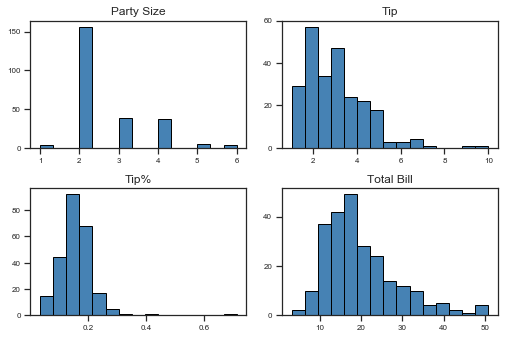

In [71]:
df.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))   

##### Interpretation of Results
* Party Size is a not a continous variable. The figure confirms that the mean is not typical of the data. 
* The distribution of Tip values, is skewed to the right. There may be some outliers in the dataset, where the tip is greater than 5 USD
* The distribution of Tip% values, is interesting, while the distribution appears to be skewed to the left, there may be some outliers in the dataset, where the tip% is greater than 40%.
* The distribution of Total Bill values, is skewed to the right.

##### 4.2.1.2 Density Plot of Univariate Data
Let’s drill down to visualizing Tip and Total Bill using a density plot to display how the data is distributed for each attribute.

C:\Users\SESA87346\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


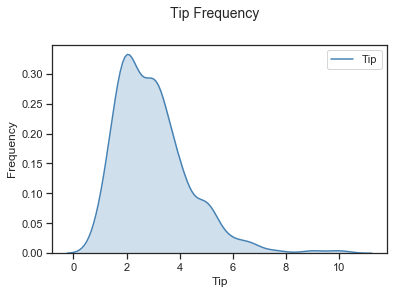

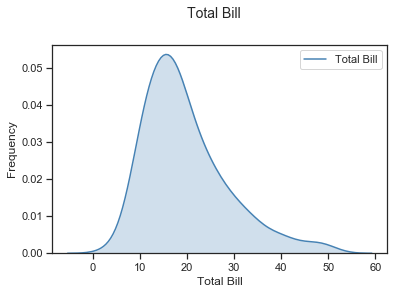

In [72]:
# Density Plot - Tip
# adapted from https://towardsdatascience.com/the-art-of-effective-visualization-of-multi-dimensional-data-6c7202990c57

# Define Parameters
fig = plt.figure(figsize = (6, 4))
title = fig.suptitle("Tip Frequency", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel("Tip")
ax.set_ylabel("Frequency") 
sns.kdeplot(df['Tip'], shade=True, color='steelblue') 

# Denisty Plot - Total Bill

# Define Paramters
fig = plt.figure(figsize = (6, 4))
title = fig.suptitle("Total Bill", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1, 1, 1)
ax1.set_xlabel("Total Bill")
ax1.set_ylabel("Frequency") 
sns.kdeplot(df['Total Bill'], shade=True, color='steelblue') 


##### Interpretation of Results
* It is quite evident from the above plots that there is a definite right skew in the distribution for both Tip and Total Bill
* The distribution of Total Bill looks like a typical Gamma Distribution

#### 4.2.2 Visualizing data in Two Dimensions (2-D) <a id='two'></a>

The next step in data visualization is to analyze two data dimensions or attributes together to identify distributions,  potential relationships, patterns and correlations amongst these attributes (Sarkar, 2018).

##### 4.2.2.1 Visualizing Two Numerical Variables Using Pairplot <a id='pair'></a>
One of the best ways to check out potential relationships or correlations amongst two different data attributes is to depict it as a pairplot, using the seaborn pairplot function. This function only works with numerical data, not categorical data.

C:\Users\SESA87346\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


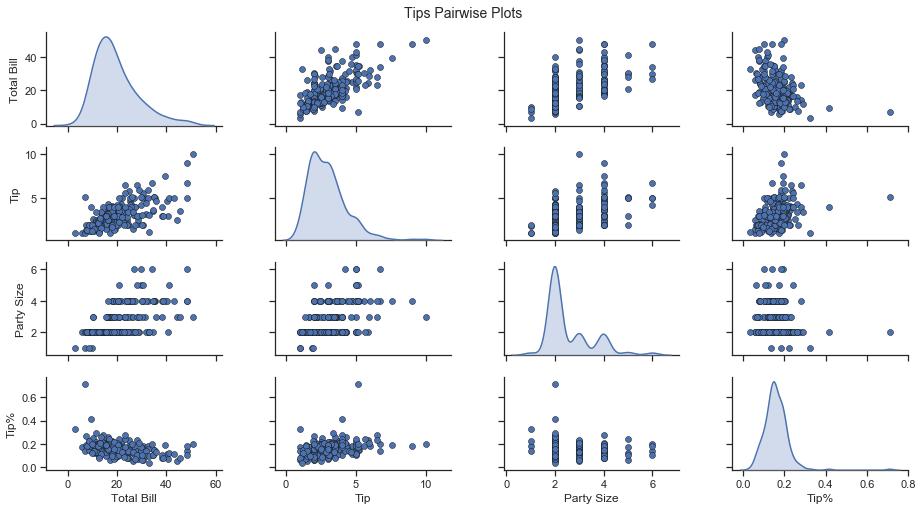

In [73]:
# Pair-wise Scatter Plots
# Adapted from https://towardsdatascience.com/the-art-of-effective-visualization-of-multi-dimensional-data-6c7202990c57

# Identify Columns to plot
cols = ['Total Bill', 'Tip', 'Party Size', 'Tip%']
# define parameters and run command
pp = sns.pairplot(df[cols], size=1.8, aspect=1.8,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(shade=True))
# create figure https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.figure.html
fig = pp.fig 
# Tune the subplot layout. https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.subplots_adjust.html
fig.subplots_adjust(top=0.93, wspace=0.3)
# Create title for figure
t = fig.suptitle('Tips Pairwise Plots', fontsize=14)

##### Interpretation of Results
* There appears to be a positive correlation between Tip and Total Bill. That is to say that as Total Bill Increases, Tip increases. This will be investigated further in the Linear Regression section.
* There appears to be a negative correlation between Tip% and Total Bill. That is to say that as Total Bill Increases, Tip%  decreases. This will be investigated further in the Linear Regression section.
* There appears to be a weak negative correlation between Tip% and Party Size. That is to say that as Party Increases, Tip%  decreases.


##### 4.2.2.2 Visualizing Two Variables:One Numerical and One Categorical Using Relplot <a id='relplot'></a>
The relplot function can be used to show the relationship between two variables, one categorical and one numerical.

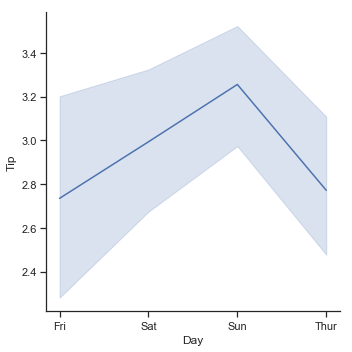

In [74]:
# Plot the relation graph between tip and day using sns.relplot function
# Adapted from https://amitkushwaha.co.in/data-visualization-part-1.html
sns.relplot('Day', 'Tip', data=df, kind='line')

##### 4.2.2.2 Visualizing Two Discrete Categorical Attributes Using Subplots <a id='pair'></a>

Sarkar (2018) outlines how to visualize two discrete categorical attributes using subplots

One way is to leverage separate plots (subplots) or facets for one of the categorical dimensions.

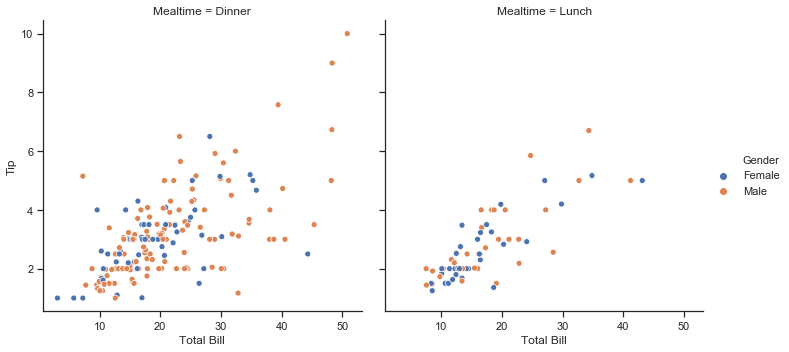

In [75]:
# Use default relpot = scatter, to plot x & y, using hue and col to show subsets of the data.
# adapted from https://seaborn.pydata.org/tutorial/relational.html
sns.relplot(x="Total Bill", y="Tip", hue="Gender",
            col="Mealtime", data=df);

Heteroscedasticity is a hard word to pronounce, but it doesn't need to be a difficult concept to understand. Put simply, heteroscedasticity (also spelled heteroskedasticity) refers to the circumstance in which the variability of a variable is unequal across the range of values of a second variable that predicts it. (Statsmakemecry.com (2012))

A scatterplot of these variables will often create a cone-like shape, as the scatter (or variability) of the dependent variable (DV) widens or narrows as the value of the independent variable (IV) increases. The inverse of heteroscedasticity is homoscedasticity, which indicates that a DV's variability is equal across values of an IV.

#### 4.2.3 Visualizing data in Three Dimensions (3-D) <a id='three'></a>
Considering three attributes or dimensions in the data, we can visualize them by considering a pair-wise scatter plot and introducing the notion of color or hue to separate out values in a categorical dimension.

#### 4.2.3.1 Pairwise Scatterplot <a id='scatterplot'></a>
The pairwise scatterplot enables you to look for correlations and patterns and also compare different series. We clearly see that bill and tip's are higher at Dinnertime versus lunctime, as might be expected.

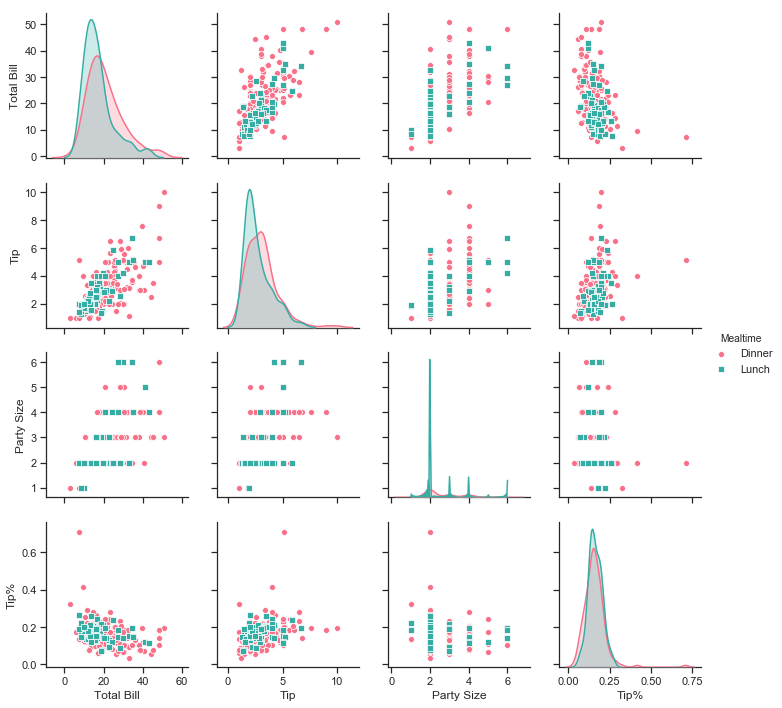

In [76]:
# adapted from https://www.datacamp.com/community/tutorials/seaborn-python-tutorial#load
# Seaborn does not have a default style, instead it comes with 5 preset styles, which must be called
# I am using seaborn themes: ticks, as it is commonly used to give extra structure to the plots https://seaborn.pydata.org/tutorial/aesthetics.html
sns.set(style="ticks")
# Construct scatterplot using pairplot function - adapted from https://seaborn.pydata.org/generated/seaborn.pairplot.html
# Hue is used to display lunch and Dinner in a different color (Series = "Mealtime").
# Palette ="husl" used to change color palette to husl instead of default. ref: https://seaborn.pydata.org/tutorial/color_palettes.html
# markers=["o", "s", "D"] are used to display different markers for each level of the hue variable:
sns.pairplot(df, hue='Mealtime', palette="husl", markers=["o", "s"])

##### Interpretation of Results
* There appears to be a narrower distribution of Total Bill at Lunchtime when compared to Dinnertime, with lower average bill.
* There appears to be very different distribution of Tip at Lunchtime when compared to Dinnertime, with lower average tip.
* The distribution of Party Size at Lunchtime is very different to dinnertime
* There appears to be very similar distribution of Tip% at Lunchtime and Dinnertime, with similar average tip%.
* There appears to be a stronger  positive correlation between Tip and Total Bill at lunctime versus dinnertime. 
* There appears to be a stronger negative correlation between Tip% and Total Bill at lunctime versus dinnertime. 
* There appears to be a stronger negative correlation between Tip% and Party Sizeat lunctime versus dinnertime. 

#### 4.2.3.2 Categorical Scatterplot <a id='categorical'></a>

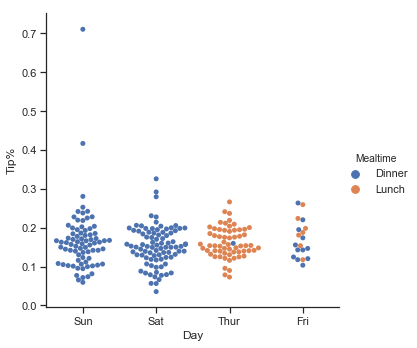

In [77]:
# Test if there is an association between day and time. Are customers really more likely to come in at lunch during the week, and dinner on the weekends?
# Use catplot to plot the relationship between tip % and day (Categorical Variable). 
# kind = swarm - converts catplot into swarmplot
# Use “mealtime” as the color to see the relationship between tip % and day split by mealtime. 

sns.catplot(x='Day', y='Tip%', hue='Mealtime', kind="swarm", data=df);


#### Interpretation of Results
* The swarmplot shows the shift pattern of the waiter. The waiter is more likely to work the lunchtime shift on Thursdays and , and dinner shift on the weekends.
* It is possible to infer from the swarmplot, that distribution of tip% on Saturday is different to Sunday and Thursday
* There appears to be little difference between Mealtimes (ie Lunch and Dinner) on tip%.

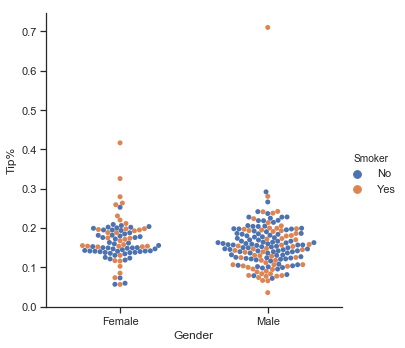

In [78]:
# Test if there is an association between gender and tip%. Are females better tippers? Do smokers tip with better ratios?
# Use catplot to plot the relationship between tip % and gender (Categorical Variable). 
# kind = swarm - converts catplot into swarmplot
# Use “Smoker” as the color to see the relationship between tip % and gender split by smoker. 

sns.catplot(x='Gender', y='Tip%', hue='Smoker', kind="swarm", data=df);

#### Interpretation of Results
* Based on the swarmplot, the bill payer is more likely to be male than female.
* It is possible to infer from the swarmplot, females tip% is greater than males. 
* Smokers are appear to tip more than non-smokers.

#### 4.2.4 Visualizing data in Four Dimensions (4-D) <a id='four'></a>

#### 4.2.4.1 Bubble Chart <a id='bubble'></a>

Sarkar (2018) suggests a a useful way to display 4 dimensions on the one chart is to generate a 2-D plot but use hue and data point size as data dimensions, this is know as a bubble chart.

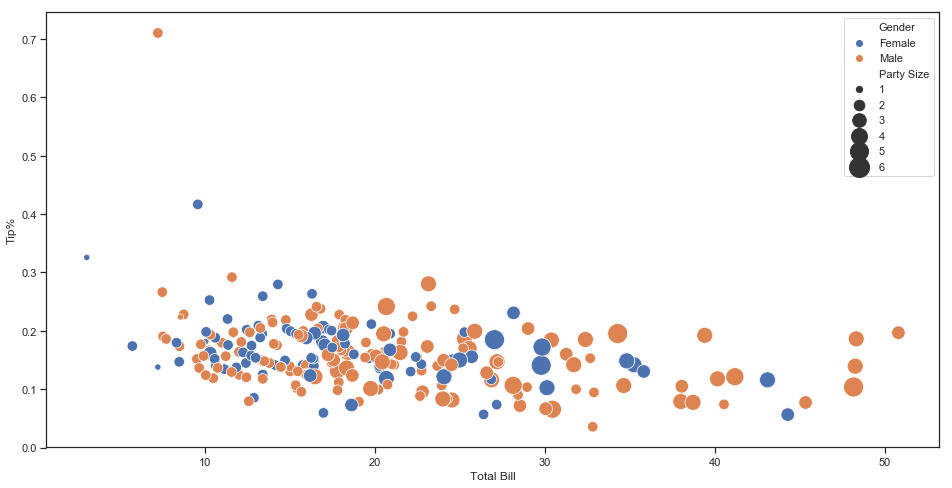

In [79]:
# Test if there is an association between the total bill and tip%. 
# Investigate whether bill size impacts tip ratio or if bigger groups tip with better ratios.
# adapted from https://seaborn.pydata.org/generated/seaborn.scatterplot.html 
# Resize the figure - taken from https://stackoverflow.com/a/53725768
plt.gcf().set_size_inches(16, 8)
# Use scatterplot to plot the relationship between tip % and total bill 
# Use “Gender” as the color to see the relationship between tip % and gender split by smoker. 
# Use "Party Size" for the bubbles
# Change the minimum and maximum point size and show all sizes in legend:
sns.scatterplot(x='Total Bill', y='Tip%', hue='Gender', size='Party Size', sizes=(40, 400), legend="full", data=df);

#### Interpretation of Results
* Male bill payer seems to have large total bill and larger party size compared to female bill payer.
* The tip % appears to decline as the total bill increases for both male and female, regardless of party size. 
* The tip % does not appear to be influenced by Party Size, but appears to be higher for females than male bill payers.

In [80]:
# Drop outliers and create new dataframe df3
# Adapted from https://thispointer.com/python-pandas-how-to-drop-rows-in-dataframe-by-index-labels/
df3 = df.drop([df.index[172],df.index[178]]) # drop index rows 172 & 178
# Generate summary statistics for dataframe df3 
df3.describe()

,Total Bill,Tip,Party Size,Tip%
count,242.000000,242.000000,242.000000,242.000000
mean,19.879835,2.985248,2.574380,0.157474
std,8.878018,1.380868,0.953615,0.047169
min,3.070000,1.000000,1.000000,0.035638
25%,13.397500,2.000000,2.000000,0.128538
50%,17.815000,2.855000,2.000000,0.154084
75%,24.222500,3.507500,3.000000,0.189956
max,50.810000,10.000000,6.000000,0.325733


## 5.0 Linear Regression <a id='linear'></a>

In this section, I will briefly describe what regression is and the types of linear regression methodologies. I will explain how I used Simple Linear Regression to determine whether there is a relationship between the total bill and tip amount, using Scikit-Learn, which is "one of the most popular machine learning libraries for Python" (Chauhan, 2019).

#### How regression works and when to use it. <a id='linear'></a>

According to Frost (2019), regression models can be used to predict changes to a dependent variable (y) given changes to one or more predictor variables (x). There are two types of Linear Regression methodologies:

1. Simple Linear Regression 
Simple linear regression algorithm identifies if there is a linear relationship between variables; x (input) and y(output), Chauhan (2019).  This relationship is represented in the form:  Y= ax + b 
Where 'b' is the intercept and 'a' is the slope of the line. The linear regression algorithm fits multiple lines on the data points and returns the line that results in the best fit (least error), (Chauhan, 2019).

2. Multiple Linear Regression
Multiple linear regression is used where there are more than two variables. In this scenario, the dependent variable(y) variable) is dependent upon more than one independent variables (Chauhan, 2019). A regression model involving multiple variables can be represented as:
y = b0 + a1b1 + a2b2 + a3b3 + … … anbn

I have decided to use Simple Linear Regression, due to lack of familiarity with Multiple Linear Regression techniques. If  I had more time, I would have adapted the Multiple Linear Regression technique used by Liran (2017), which used variables such as sex, smoker, size, day and time to predict tips.  


### 5.1 Simple Linear Regression <a id='simple'></a>

Simple linear regression is used to identify a straight-line which best fits to data. 
Stojiljkovic (2019) outlines five basic steps in implementing linear regression:

1. Import the packages and classes.
2. Provide the data to analyse.
3. Create a regression model and fit it with the data.
4. Check the results of model fitting and decide whether to accept or reject the model.
5. Make predictions using the model.

#### 5.1.1 Import Packages and Classes

In [81]:
# The first step is to import the class LinearRegression from sklearn.linear_model
# The class sklearn.linear_model.LinearRegression will be used to perform linear regression using the Ordinary Least Squares model to fit this data and construct the best-fit line
# adapted from https://realpython.com/linear-regression-in-python/
from sklearn.linear_model import LinearRegression

#### 5.1.2 Provide Data
The second step is defining data you wish to analyse. This involves defining the input (predictor variable, the x) and output (dependent variable, the 𝑦), these variables should be in the form of NumPy arrays (Stojiljkovic, 2019).

In [82]:
# As I want to predict the Tip value depending upon the Total Bill value recorded. 
# The variables I selected are “Total Bill” column which is stored in the X variable, and the “Tip” column which is stored in y variable.

# Create array consisting of the two columns; x and y variables
predictors = df[['Total Bill', 'Tip']]
# display shape
predictors.shape
# print the shape of the array ie 244 rows, 2 columns.

(244, 2)

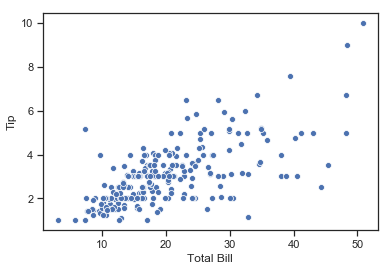

In [83]:
# Create a simple scatterplot to visualize the data
sns.scatterplot(x='Total Bill', y='Tip', sizes=(40, 400), legend="full", data=predictors)
# print scatterplot

In [84]:
# Solution adapted from https://www.kaggle.com/lalitharajesh/iris-dataset-exploratory-data-analysis
# Convert the input variable 'Total Bill' into an array XX: 
XX = np.asarray(predictors['Total Bill']) # https://docs.scipy.org/doc/numpy/reference/generated/numpy.asarray.html
# Convert 1 array XX into 2D array called X2 in the shape of a column vector by inserting an axis along second dimension
X2 = XX[:, np.newaxis] # https://medium.com/@ian.dzindo01/what-is-numpy-newaxis-and-when-to-use-it-8cb61c7ed6ae
# Print shape of X2 array
X2.shape

(244, 1)

In [85]:
y2 = predictors['Tip']
y2.shape

(244,)

#### 5.1.3 Create a regression model and fit it 

In [86]:
# Create an instance of the class LinearRegression, called model representing the regression model: https://realpython.com/linear-regression-in-python/

# Define Parameters 
    # Define the parameters of the regression model, source https://realpython.com/linear-regression-in-python/
    # fit_intercept=True , the y-intercept will be determined by the line of best fit. https://stackoverflow.com/a/46781428
    # normalize is a Boolean (False by default) that decides whether to normalize the input variables (True) or not (False).
    # copy_X is a Boolean (True by default) that decides whether to copy (True) or overwrite the input variables (False).
    # n_jobs is an integer or None (default) and represents the number of jobs used in parallel computation. None usually means one job and -1 to use all processors.

# call .fit() on model: https://realpython.com/linear-regression-in-python/
# 
model = LinearRegression(fit_intercept=True).fit(X2, y2)
# Print Model
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

#### 5.1.4 Get Results

In [87]:
r_sq = model.score(X2, y2)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.45661658635167657


In [88]:
# Regression coefficients - adapted from https://www.kaggle.com/lalitharajesh/iris-dataset-exploratory-data-analysis
# Regression coefficients are estimates of the unknown population parameters and describe the relationship between a predictor variable and the response. 
# In linear regression, coefficients are the values that multiply the predictor values. 
# Use sklearn coef function to display the coefficient for the line of best fit taken from 'model'
r_coef = model.coef_
print('regression coefficient (slope):', r_coef)

regression coefficient (slope): [0.10502452]


In [89]:
constant = model.intercept_
print('y intercept:', constant)

y intercept: 0.9202696135546731


#### 5.1.5 Predict response
Once you are happy with the model, the next step is to predict the response using some test data

In [90]:
# Create test data 
# Generate 244 samples in range 0 to 51 (which approximates range of bills) using NumPy Random Randint function
# adapted from https://www.kaggle.com/lalitharajesh/iris-dataset-exploratory-data-analysis
Xfit = np.random.randint(51,size=(244))
# astype is used to convert integers to floats in Pandas DataFrame: https://datatofish.com/integer-to-float-dataframe/
Xfit.astype(float)
# Convert 1D array Xfit into 2D array in the shape of a column vector by inserting an axis along second dimension
Xfit = Xfit[:, np.newaxis] # https://medium.com/@ian.dzindo01/what-is-numpy-newaxis-and-when-to-use-it-8cb61c7ed6ae
# display the shape of an array Xfit
Xfit.shape # adapted from https://stackoverflow.com/a/10200284


(244, 1)

In [91]:
# To obtain the predicted response, use .predict(): https://realpython.com/linear-regression-in-python/
yfit = (model.predict(Xfit))
print('predicted response:', yfit, sep='\n')
# Answer

predicted response:
[4.59612772 5.22627483 2.70568641 3.65090707 0.92026961 2.18056382
 4.59612772 2.60066189 2.49563737 3.96598062 5.54134838 5.96144645
 2.70568641 2.91573544 4.28105417 2.81071093 5.12125031 1.86549027
 5.33129934 2.0755393  2.91573544 3.12578448 2.60066189 3.12578448
 3.230809   1.65544124 4.17602965 5.96144645 1.86549027 3.33583351
 2.28558834 1.65544124 5.54134838 1.13031865 2.60066189 4.38607869
 3.65090707 4.91120127 4.80617676 1.86549027 4.17602965 2.60066189
 1.97051479 1.34036768 1.4453922  5.6463729  2.70568641 4.59612772
 2.49563737 1.86549027 3.02075996 2.28558834 3.96598062 5.43632386
 1.4453922  1.55041672 3.44085803 4.07100514 1.55041672 2.0755393
 4.28105417 2.18056382 2.39061286 4.91120127 1.02529413 2.91573544
 1.13031865 1.86549027 6.06647097 1.34036768 2.70568641 1.76046575
 1.02529413 3.02075996 6.17149548 2.28558834 2.81071093 2.49563737
 3.12578448 4.38607869 4.70115224 1.55041672 5.75139741 2.60066189
 1.13031865 5.01622579 4.28105417 4.8061767

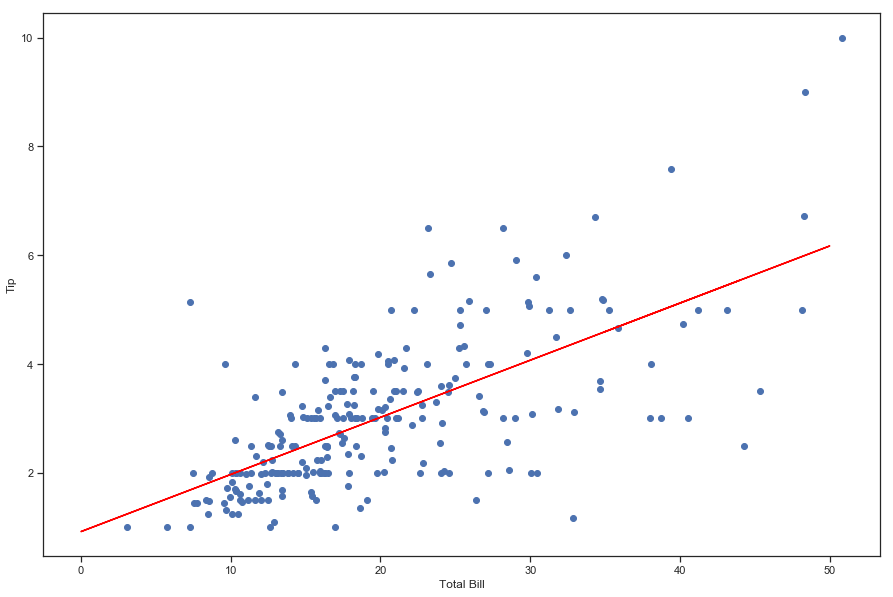

In [92]:
# Visualize the results

# Resize Plot to creates a figure with 15 (width) x 10 (height) inches - Adapted from https://stackoverflow.com/a/36368418
plt.figure(figsize=(15,10))
plt.xlabel('Total Bill') # Label x Axis 
plt.ylabel('Tip') # Label y Axis 

# Create a scatter plot of X2 and y2 and plot the regression line which is the predicted response when data is input into the regression model
plt.scatter(X2, y2)
plt.plot(Xfit, yfit,color="red")
plt.show()

#### Sample Prediction - What is the expected tip if the bill was 100USD

In [93]:
# Create X variable, ie test bill value 100USD 
# adapted from https://www.kaggle.com/lalitharajesh/iris-dataset-exploratory-data-analysis
# Testbill is an array containing 1 integer, value 100, representing 100USD Bill
Testbill = np.array([100]) # https://docs.scipy.org/doc/numpy/user/basics.creation.html

# Convert 1D array Xfit into 2D array in the shape of a column vector by inserting an axis along second dimension
Testbill = Testbill[:, np.newaxis] # https://medium.com/@ian.dzindo01/what-is-numpy-newaxis-and-when-to-use-it-8cb61c7ed6ae
# display the shape of an array Testbill
Testbill.shape # adapted from https://stackoverflow.com/a/10200284

(1, 1)

In [94]:
# Predict Tip for Total Bill of $100
# To obtain the predicted response, use .predict(): https://realpython.com/linear-regression-in-python/
y_pred = (model.predict(Testbill))
print('Predicted tip if Total Bill is $100USD is:', y_pred)

Predicted tip if Total Bill is $100USD is: [11.42272135]


### 5.2 Regression analysis <a id='regression'></a>

#### Regression Coefficient (Slope)

1. According to Frost (2019), the sign of regression coefficient indicates the direction of the relationship between a predictor variable and the dependent variable. When the sign is positive it means that an increase in the predictor variable leads to an increase in the dependent variable. A negative sign means that as the predictor variable increases in value, the dependent variable decreases in value. 

    * In this case, the regression coefficient sign is positive. This indicates that as the Total Bill increases, the response variable (Tip) also increases. 
    
2. The regression coefficient value represents "the mean change in the response given a one unit change in the predictor" (Frost, 2019). 
    * In this case, the regression coefficient value 0.10502452, means that for every dollar increase in Total Bill, the Tip is predicted to be 10.5% higher. 

#### Coefficient of Determination

The coefficient of determination (denoted by R2) measure how well the regression model fits the data. This metric is useful and decide whether to accept or reject the model of regression analysis used. R2 represents the proportion of the variance in the dependent variable that is predictable from the independent variable, (StatTrek, 2019). In linear regression, the coefficient of determination is equal to the square of the correlation between x and y scores.

* An R2 of 0 means that the y variable cannot be predicted from the x variable and the model should be rejected
* An R2 of 1 means the y variable can be predicted 100% of the time from the x variable and the model should be accepted.
* An R2 between 0 and 1 indicates the extent to which the y variable is predictable. The closer the R2 is to 1, the lower the error in predicting Y from X. The lower the R2 value is, the greater the error (variance).

Analysis of the R2 Score:

    * An R2 of 0.45661658635167657 means that 45.66 percent of the variance in Y is predictable from X.
    * While the R2 value is low, this result compares well with other studies which attempt to predict human behaviour, where R2 values are typically less than 50% (Minitab, 2019)

#### Conclusion

The model is accepted and the model has determined there is a positive relationship between the total bill and tip amount, that is to say that as the Total Bill increases, the Tip value also increases.

## 6.0 Conclusions <a id='conclusions'></a>

1. Data Structure
    * The 'day' column contains string values, which limits the kind of analysis you can do with as it is categorical rather than numerical data. It would be better if this data had been logged as dates, which are a continous variable. 
        * Continous variables are numerical, which makes them easier to analyse and they are very precise, meaning that there is less ambiguity when results are interpreted. For example, it would allow us to interpret whether tips recorded as Saturday were recorded on one day or over a period of weeks. 
        * It would allow us to infer other important factors such as seasonality, for instance, does total bill and tips change much over time, e.g. is there any a pattern which could be attributed to payday or factors such as holidays such as Easter / Valentines Day which may influence party size / total bill etc etc.
    * I did make an attempt to convert the day into a number, but this was a discrete variable and it did not provide any further insights into the data, than I was already able to ascertain using the categorical data.
    * If I was analysing the data set again, I would have considered using Day Number field in a Multiple Regression.
2. Possible Bias in Data
The results show a wide variation in the number of tips recorded by day and mealtime. This suggests that the pattern of day and mealtime isnt random, reflecting the waiters shift schedule. As the waiter is more likely to work the lunchtime shift on Thursdays and the dinner shift on Saturday and Sunday. Therefore, it may not be possible to clearly establish any relationship between day and or mealtime with tips as the dataset is biased based on one workers shift schedule. More data is needed on tips recorded by other waiters working other shift patterns in order to draw any reliable conclusions if tips are related to day or mealtime.
3. How to Maximise Tips
From my analysis of the dataset, if I was advising a waiter how to maximise his/her tips, I would suggest the following
    * The best day for tips is Saturday, followed by Sunday.
    * The best shift for tips is the Dinnertime shift
    * Male bill payer, non-smoker gives the highest average tip.
    * Smaller parties tip better than larger parties, 3 tables of 2 people will tip more than one table of 6 people, for the same effort.
    
4. Simple v Multiple Regression
I decided to use Simple Linear Regression, due to lack of familiarity with Multiple Linear Regression techniques. If  I had more time, I would have adapted the Multiple Linear Regression technique used by Liran (2017), which used variables such as sex, smoker, size, day and time to predict tips. 


## 7.0 References <a id='references'></a>
   1. Eargle, D (2016) *Data Mining Assignment – Tips* [Online] Available at:https://daveeargle.com/assignments/data-mining/restaurant-tip-ratios.docx [Accessed 19 Oct 2019]
   1. Bryant, P. G. and Smith, M (1995) *Practical Data Analysis: Case Studies in Business Statistics* Homewood, IL: Richard D. Irwin Publishing.
   1. Waskom, M (2014) *seaborn-data* [Online] Available at:https://github.com/mwaskom/seaborn-data/blob/master/tips.csv [Accessed 18 Oct 2019]
   2. Computer Hope (2018) *How To Create A CSV File* [Online] Available at: https://www.computerhope.com/jargon/n/newline.htm [Accessed 1 April 2019].
   3. Glen, S (2014) *Pearson Mode Skewness* [Online] Available at:https://www.statisticshowto.datasciencecentral.com/pearson-mode-skewness/ [Accessed 18 Oct 2019]
   4. McLoughlin, I (2019) *Descriptive Statistics and Plots with Pandas* [Online] Available at:https://web.microsoftstream.com/video/ecc9ce4a-c6f5-4c50-a4f4-29116fc21b81?referrer=https:%2F%2Flearnonline.gmit.ie%2Fcourse%2Fview.php%3Fid%3D689 [Accessed 18 Oct 2019]
   1. McKinney, W (2019) *Wes McKinney: pandas in 10 minutes | Walkthrough* [Online] Available at:https://www.youtube.com/watch?foo=bar&v=_T8LGqJtuGc [Accessed 19 Oct 2019]
   1. McKinney, W (2012) *Python for Data Analysis* 1st Ed. O’Reilly Media, Inc.
   1. Haunschmid, V (2017) *How to make inline plots in Jupyter Notebook larger?* [Online] Available at:https://stackoverflow.com/a/36368418 [Accessed 26 Oct 2019]
   1. Willems, K (2017) *Python Exploratory Data Analysis Tutorial* [Online] Available at:https://www.datacamp.com/community/tutorials/exploratory-data-analysis-python [Accessed 26 Oct 2019]
   1. Bundock, V (2019) *R Week 4 Assignment - Charting Tips* [Online] Available at:http://rstudio-pubs-static.s3.amazonaws.com/128623_507fbe51532748f29278825fceedab85.html [Accessed 26 Oct 2019]
   1. geeksforgeeks.org (2019) *Python | Pandas dataframe.groupby()* [Online] Available at:https://www.geeksforgeeks.org/python-pandas-dataframe-groupby/ [Accessed 10 Nov 2019]
   1. Frost, J (2019) *Regression coefficients* [Online] Available at:https://statisticsbyjim.com/glossary/regression-coefficient/ [Accessed 17 Nov 2019]
   1. Chauhan, N (2019) *A beginner’s guide to Linear Regression in Python with Scikit-Learn* [Online] Available at:https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f [Accessed 17 Nov 2019]
   1. StatTrek.com (2019) *Coefficient of Determination* [Online] Available at:https://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination [Accessed 19 Nov 2019]
   1. Stojiljkovic, M (2019) *Simple Linear Regression With scikit-learn* [Online] Available at:https://realpython.com/linear-regression-in-python/ [Accessed 19 Nov 2019]
   1. Minitab.com (2019) *Regression Analysis: How Do I Interpret R-squared and Assess the Goodness-of-Fit?* [Online] Available at:https://blog.minitab.com/blog/adventures-in-statistics-2/regression-analysis-how-do-i-interpret-r-squared-and-assess-the-goodness-of-fit [Accessed 19 Nov 2019]
   1. Waskom, M (2018) *Visualizing statistical relationships* [Online] Available at:https://seaborn.pydata.org/tutorial/relational.html [Accessed 23 Nov 2019]
   1. Statsmakemecry.com (2012) *Confusing Stats Terms Explained: Heteroscedasticity (Heteroskedasticity)* [Online] Available at:http://www.statsmakemecry.com/smmctheblog/confusing-stats-terms-explained-heteroscedasticity-heteroske.html [Accessed 23 Nov 2019]
   1. Sharma, N (2018) *Exploratory Data Analysis (EDA) techniques for Kaggle competition beginners* [Online] Available at:https://towardsdatascience.com/exploratory-data-analysis-eda-techniques-for-kaggle-competition-beginners-be4237c3c3a9 [Accessed 23 Nov 2019]
   1. Doshi, S (2019) *EAnalyze the data through data visualization using Seaborn* [Online] Available at:https://towardsdatascience.com/analyze-the-data-through-data-visualization-using-seaborn-255e1cd3948e [Accessed 23 Nov 2019]
   1. Sharma, N (2018) *Cleaning data for data visualisation* [Online] Available 
   https://confusedcoders.com/data-science/cleaning-data-for-data-visualisation [Accessed 24 Nov 2019]
   1. National Institute of Standards and Technology (2012) *What is EDA?* [Online] Available at:
   https://www.itl.nist.gov/div898/handbook/eda/section1/eda11.htm [Accessed 24 Nov 2019]
   1. Sarkar, D (2018) *The Art of Effective Visualization of Multi-dimensional Data* [Online] Available at: 
    https://towardsdatascience.com/the-art-of-effective-visualization-of-multi-dimensional-data-6c7202990c57 [Accessed 24 Nov 2019]
   1. Liran, B (2017) *PYTHON MACHINE LEARNING EXAMPLE – LINEAR REGRESSION* [Online] Available at: 
    https://devarea.com/python-machine-learning-example-linear-regression/#.XeDYeej7TIV [Accessed 27 Nov 2019]
   